In [716]:
import pandas as pd
import numpy as np

In [717]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [718]:
events_data = pd.read_csv('data\event_data_train.zip', compression='zip')
submissions_data = pd.read_csv('data\submissions_data_train.zip', compression='zip')

In [719]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [720]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [721]:
events_data['data'] = pd.to_datetime(events_data['timestamp'], unit='s')
events_data.head()

,step_id,timestamp,action,user_id,data
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [722]:
events_data.data.min()

Timestamp('2015-06-15 04:00:48')

In [723]:
events_data.data.max()

Timestamp('2018-05-19 23:33:31')

In [724]:
events_data['day'] = events_data.data.dt.date

In [725]:
events_data.head()

,step_id,timestamp,action,user_id,data,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [726]:
events_data.groupby('day').user_id.nunique().head(7)

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
2015-06-20    294
2015-06-21    292
Name: user_id, dtype: int64

In [727]:
sns.set_theme(rc={'figure.figsize' : (9,6)})

<Axes: xlabel='day'>

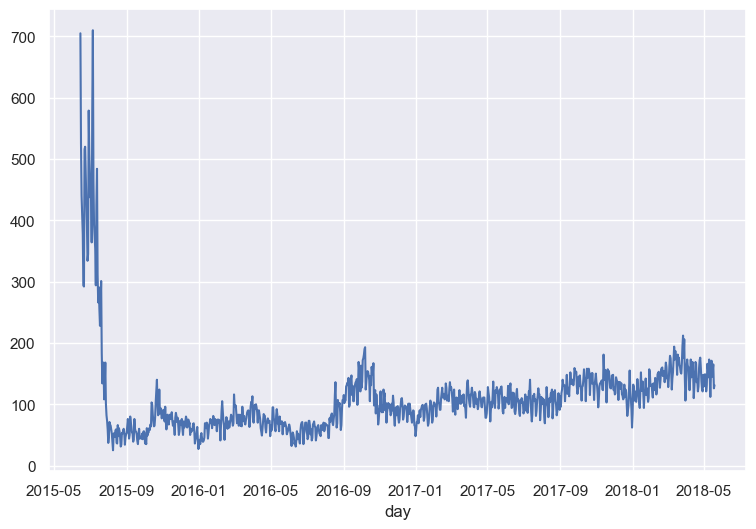

In [728]:
events_data.groupby('day').user_id.nunique().plot()

<Axes: xlabel='day'>

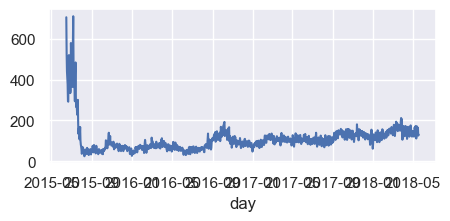

In [729]:
events_data.groupby('day').user_id.nunique().plot(figsize=(5,2))

In [730]:
# events_data[events_data['action'] == 'passed'].groupby('user_id', as_index=False).agg({'step_id': 'count'}).rename(columns={'step_id':'passed_count'})

In [731]:
# events_data[events_data['action'] == 'passed'].groupby('user_id', as_index=False).agg({'step_id': 'count'}).rename(columns={'step_id':'passed_count'}).passed_count.hist()

<Axes: >

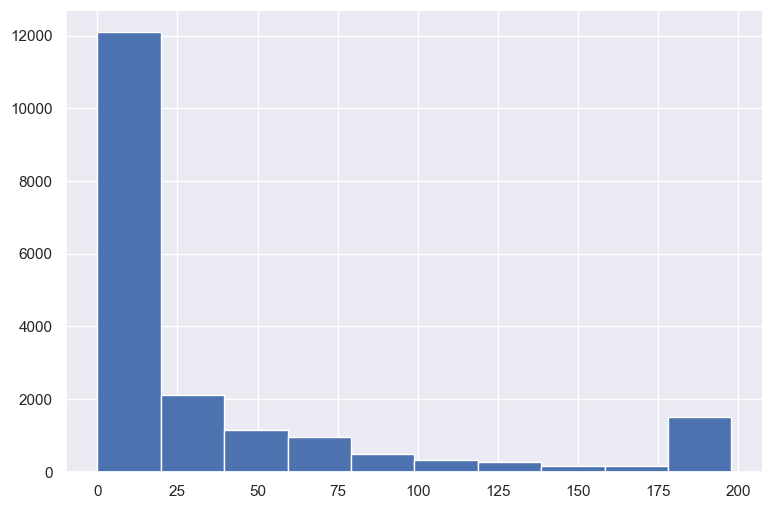

In [732]:
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index().discovered.hist()

In [733]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [734]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [735]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [736]:
submissions_data.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [737]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [738]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
.groupby('user_id')['timestamp'].apply(list) \
.apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [739]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
.groupby('user_id')['timestamp'].apply(list) \
.apply(np.diff).values

In [740]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [741]:
gap_data = gap_data / (24 * 60 * 60)

<Axes: >

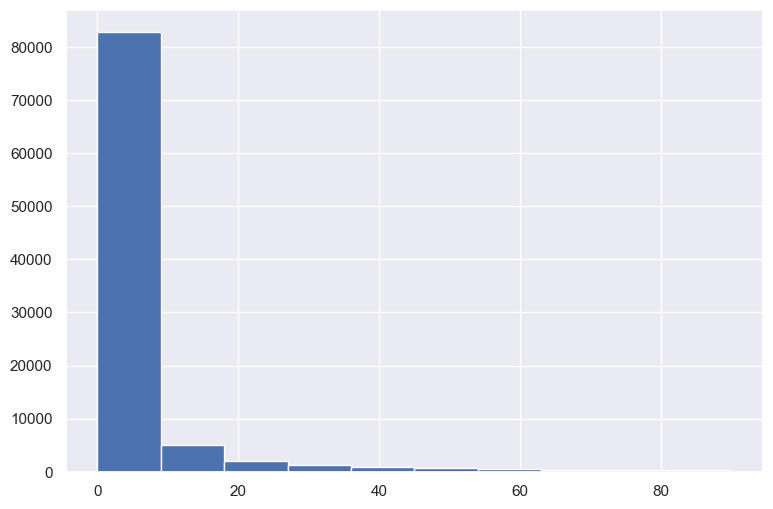

In [742]:
gap_data[gap_data < 90].hist()

In [743]:
gap_data.quantile(0.95)

59.760440972222156

In [744]:
gap_data.quantile(0.90)

18.325995370370403

In [745]:
events_data.tail()

,step_id,timestamp,action,user_id,data,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [746]:
user_data = events_data.groupby('user_id', as_index=False).agg({'timestamp' : 'max'}).head()
user_data.head()

,user_id,timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [747]:
now = events_data['timestamp'].max()
now

1526772811

In [748]:
drop_out_treshhold = 30 * 24 * 60 * 60
drop_out_treshhold

2592000

In [749]:
user_data['is_gone_user'] = (events_data['timestamp'].max() - user_data['timestamp']) > (30 * 24 * 60 * 60)

In [750]:
user_data.head()

,user_id,timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [751]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [752]:
user_scores = submissions_data.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index()

In [753]:
events_data.head()

,step_id,timestamp,action,user_id,data,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [754]:
user_event_data = events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()

In [755]:
user_event_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [756]:
user_data = user_data.merge(user_scores, on='user_id', how='outer')

In [757]:
user_data = user_data.fillna(0)
user_data.head()

,user_id,timestamp,is_gone_user,correct,wrong
0,1,1.472827e+09,True,0.0,0.0
1,2,1.519227e+09,True,2.0,0.0
2,3,1.444582e+09,True,29.0,23.0
3,5,1.499860e+09,True,2.0,2.0
4,7,1.521635e+09,True,0.0,0.0


In [758]:
user_days = events_data.groupby('user_id')['day'].nunique()

In [759]:
user_days

user_id
1        1
2        2
3        7
5        2
7        1
        ..
26790    4
26793    1
26794    9
26797    2
26798    1
Name: day, Length: 19234, dtype: int64

In [760]:
user_days.to_frame().reset_index()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [761]:
user_data = user_data.merge(user_event_data, on='user_id', how='outer')
user_data.head()

,user_id,timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1


In [762]:
user_data = user_data.merge(user_days, on='user_id', how='outer')
user_data.head()

,user_id,timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1


In [763]:
user_data.user_id.nunique()

19234

In [764]:
events_data.user_id.nunique()

19234

In [765]:
user_data['passed_corse'] = user_data['passed'] > 170

,user_id,timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1,False
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2,False
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7,False
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2,False
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,0.000000e+00,0,1.0,0.0,8,8,1,9,4,False
19230,26793,NaN,NaN,NaN,NaN,1,0,1,1,1,False
19231,26794,0.000000e+00,0,33.0,9.0,69,69,34,180,9,False
19232,26797,0.000000e+00,0,2.0,0.0,10,10,2,13,2,False


In [768]:
user_data.groupby('passed_corse').count().reset_index()

,passed_corse,user_id,timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,False,17809,8517,8517,8517,8517,17809,17809,17809,17809,17809
1,True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [770]:
1425 / 17809 * 100

8.001572238755687

In [776]:
import math

In [777]:
sorted([-1,0,4,2,1,2])
np.median(sorted([-1,0,4,2,1,2]))

1.5